In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset_Citation_Request.txt
/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx
/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.arff


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

2026-02-19 20:36:02.977048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771533363.245464      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771533363.321142      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771533363.967596      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771533363.967656      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771533363.967660      55 computation_placer.cc:177] computation placer alr

In [4]:
# 1. Load dataset
data = pd.read_excel("/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

print("--- Data Info ---")
data.info()

print("\n--- Missing Values ---")
print(data.isnull().sum())

print("\n--- Summary Statistics ---")
display(data.describe())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


/tmp/ipykernel_55/1425780601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', order=data['Class'].value_counts().index, palette='viridis')


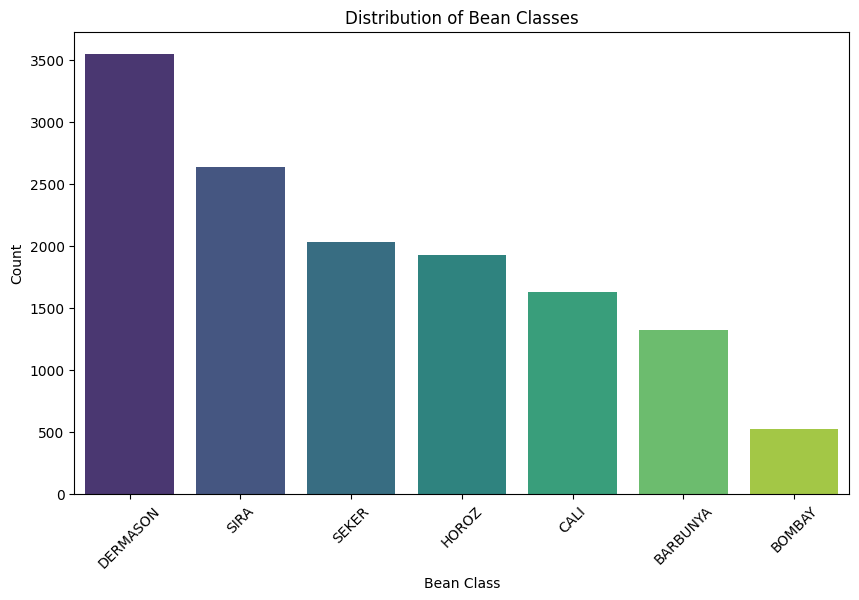

In [13]:
#Class Balance
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Class', order=data['Class'].value_counts().index, palette='viridis')
plt.title('Distribution of Bean Classes')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

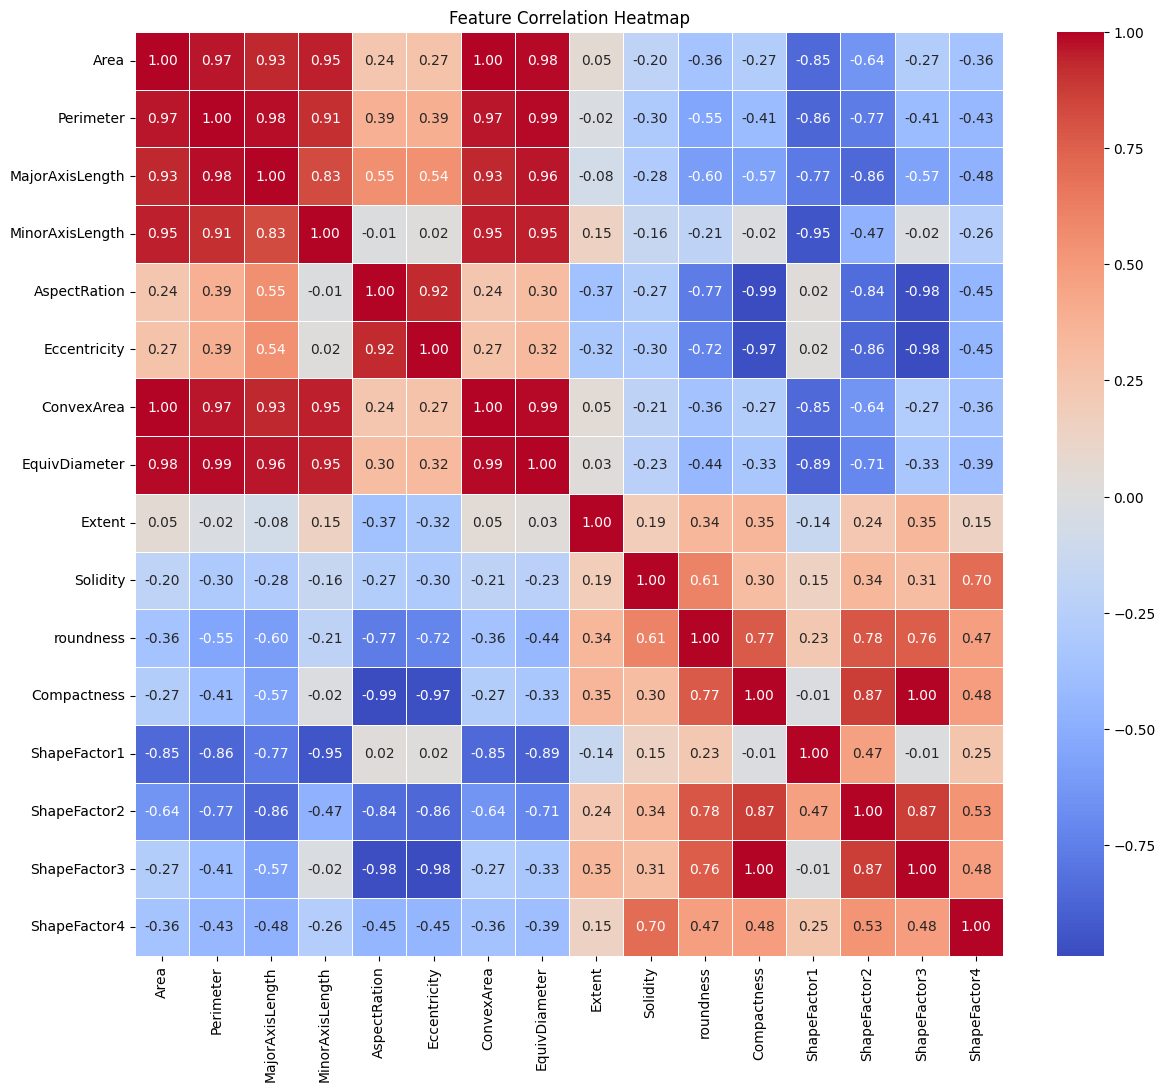

In [14]:
plt.figure(figsize=(14, 12))
# Drop the categorical 'Class' column before calculating the correlation matrix
correlation_matrix = data.drop("Class", axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
X = data.drop("Class", axis=1).values   # 16 features
y = data["Class"].astype("category").cat.codes.values  # convert labels to integers (0–6)

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Build model
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(16,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(7, activation="softmax")  # final layer with 7 units
    ])
    return model

In [17]:
# -------------------------------
# Experiment 1: Categorical Cross-Entropy
# -------------------------------
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=7)

model_cat = build_model()
model_cat.compile(optimizer="adam",
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=["accuracy"])

print("\nTraining with Categorical Cross-Entropy...")
history_cat = model_cat.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# -------------------------------
# Experiment 2: Sparse Categorical Cross-Entropy
# -------------------------------
model_sparse = build_model()
model_sparse.compile(optimizer="adam",
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=["accuracy"])

print("\nTraining with Sparse Categorical Cross-Entropy...")
history_sparse = model_sparse.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Training with Categorical Cross-Entropy...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6572 - loss: 1.0806 - val_accuracy: 0.9123 - val_loss: 0.2773
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9203 - loss: 0.2576 - val_accuracy: 0.9164 - val_loss: 0.2427
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.2118 - val_accuracy: 0.9233 - val_loss: 0.2228
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.1997 - val_accuracy: 0.9242 - val_loss: 0.2160
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.2068 - val_accuracy: 0.9261 - val_loss: 0.2195
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.1991 - val_accuracy: 0.9261 - val_loss: 0.2171
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.1948 - val_accuracy: 0.9279 - val_loss: 0.2154
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.1911 - val_accuracy: 0.9233 - val_

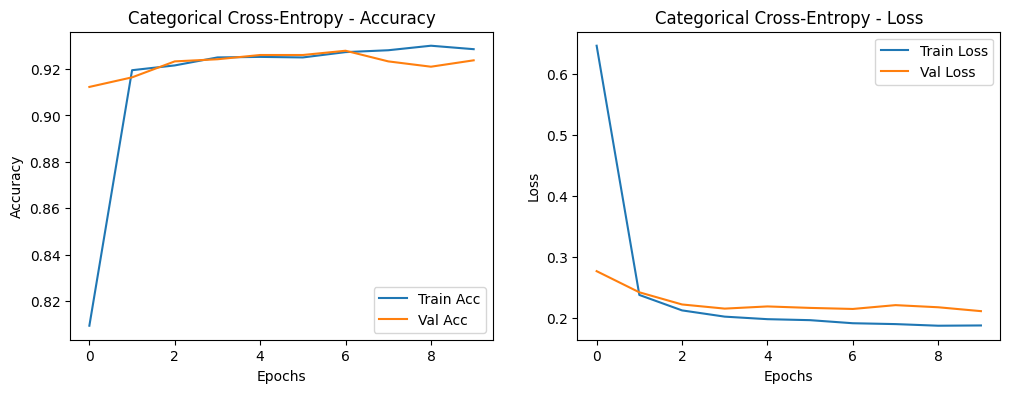

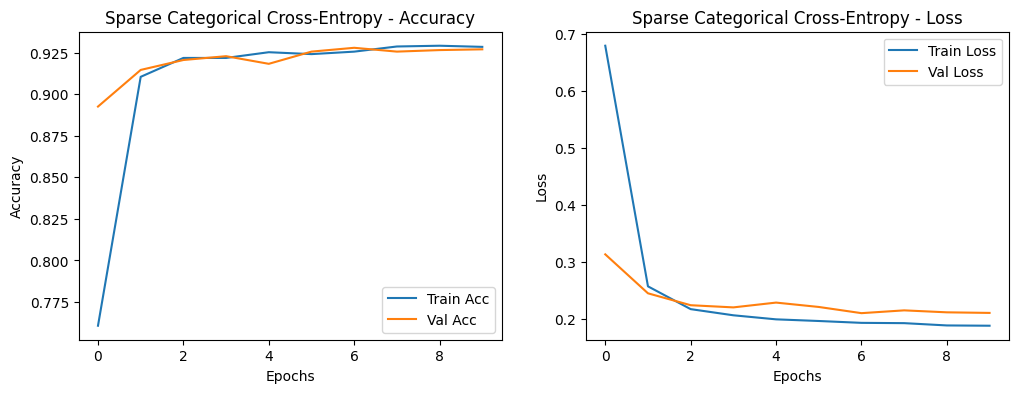

In [18]:
# -------------------------------
# Plot Accuracy & Loss Curves
# -------------------------------
def plot_curves(history, title):
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_curves(history_cat, "Categorical Cross-Entropy")
plot_curves(history_sparse, "Sparse Categorical Cross-Entropy")